In [ ]:
validation_path='/content/drive/MyDrive/balanced dataset/validationT'

In [ ]:
%cd /content/drive/MyDrive/balanced dataset


[Errno 2] No such file or directory: '/content/drive/MyDrive/balanced dataset'
/content


In [ ]:
!pwd

/content


In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

from PIL import Image

from torch import nn
from torchvision import transforms
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import os
import glob
import torch
from torchvision import transforms
from PIL import Image

def get_image_files(directory):
    # Define supported image extensions
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp']

    # Initialize list to store image file paths
    image_files = []

    # Iterate through each image extension and search for files
    for ext in image_extensions:
        # Use glob to find files with the current extension
        image_files.extend(glob.glob(os.path.join(directory, ext)))

    return image_files

def predict_class(model, image_path, class_names, image_size=(224, 224), transform=None, device='cuda'):
    # Load the image
    img = Image.open(image_path)

    # Define transformation if not provided
    if transform is None:
        transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

    # Ensure model is on the correct device
    model.to(device)

    # Set model to evaluation mode
    model.eval()

    with torch.inference_mode():
        # Transform and add an extra dimension to image
        transformed_image = transform(img).unsqueeze(dim=0).to(device)

        # Make prediction
        prediction = model(transformed_image)

        # Get predicted class
        predicted_class_index = torch.argmax(prediction, dim=1).item()
        predicted_class = class_names[predicted_class_index]

    return predicted_class


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 949.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
!unzip /content/drive/MyDrive/YoloCustonTraining/combineNewImg.zip -d /content/YoloModel

Archive:  /content/drive/MyDrive/YoloCustonTraining/combineNewImg.zip
   creating: /content/YoloModel/content/runs/detect/train/
  inflating: /content/YoloModel/content/runs/detect/train/train_batch2.jpg  
  inflating: /content/YoloModel/content/runs/detect/train/labels_correlogram.jpg  
  inflating: /content/YoloModel/content/runs/detect/train/P_curve.png  
  inflating: /content/YoloModel/content/runs/detect/train/F1_curve.png  
  inflating: /content/YoloModel/content/runs/detect/train/val_batch2_pred.jpg  
  inflating: /content/YoloModel/content/runs/detect/train/PR_curve.png  
  inflating: /content/YoloModel/content/runs/detect/train/confusion_matrix.png  
  inflating: /content/YoloModel/content/runs/detect/train/events.out.tfevents.1711435649.2ced83946735.1325.0  
  inflating: /content/YoloModel/content/runs/detect/train/train_batch7470.jpg  
  inflating: /content/YoloModel/content/runs/detect/train/train_batch0.jpg  
  inflating: /content/YoloModel/content/runs/detect/train/R_curv

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/YoloModel/content/runs/detect/train/weights/best.pt')

In [ ]:
def YoloPrediction(model, image):
  results = model.predict(image)
  if len(results[0].boxes.xyxy)==0:
    return 0
  else:
    return 1

In [ ]:
len(elephant_pred)

84

In [ ]:
elephant_pred=[]
directory_path_elephant = '/content/drive/MyDrive/cleaned dataset/balanced dataset/validationT/elephant'
image_files_elephant = get_image_files(directory_path_elephant)
for i in image_files_elephant:
  elephant_pred.append(YoloPrediction(model, i))


image 1/1 /content/drive/MyDrive/cleaned dataset/balanced dataset/validationT/elephant/Elephant Sounds - Noises14.png: 640x320 1 ELEPHANT, 73.1ms
Speed: 16.5ms preprocess, 73.1ms inference, 693.9ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 /content/drive/MyDrive/cleaned dataset/balanced dataset/validationT/elephant/ELEPHANT SOUNDS FOR KIDS - Learn Trumpeting Rumbling and Roaring Sound Effects of Elephants22.png: 640x320 2 ELEPHANTs, 15.2ms
Speed: 1.6ms preprocess, 15.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 /content/drive/MyDrive/cleaned dataset/balanced dataset/validationT/elephant/ELEPHANT SOUNDS FOR KIDS - Learn Trumpeting Rumbling and Roaring Sound Effects of Elephants1.png: 640x320 2 ELEPHANTs, 15.2ms
Speed: 1.6ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 /content/drive/MyDrive/cleaned dataset/balanced dataset/validationT/elephant/ELEPHANT SOUNDS FOR KIDS - Learn Trumpetin

In [ ]:
nonelephant_pred=[]
directory_path_nonelephant = '/content/drive/MyDrive/cleaned dataset/balanced dataset/validationT/nonelephant'
image_files_nonelephant = get_image_files(directory_path_nonelephant)
for i in image_files_nonelephant:
  nonelephant_pred.append(YoloPrediction(model, i))


image 1/1 /content/drive/MyDrive/cleaned dataset/balanced dataset/validationT/nonelephant/FARM ANIMALS on the FARM (real authentic sounds) compilation - 55 min KID COLLECTION - Part 2144.png: 640x320 (no detections), 22.5ms
Speed: 2.2ms preprocess, 22.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 /content/drive/MyDrive/cleaned dataset/balanced dataset/validationT/nonelephant/FARM ANIMALS on the FARM (real authentic sounds) compilation - 55 min KID COLLECTION - Part 2131.png: 640x320 (no detections), 26.8ms
Speed: 1.9ms preprocess, 26.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 /content/drive/MyDrive/cleaned dataset/balanced dataset/validationT/nonelephant/FARM ANIMALS on the FARM (real authentic sounds) compilation - 55 min KID COLLECTION - Part 2122.png: 640x320 (no detections), 51.2ms
Speed: 1.9ms preprocess, 51.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 /content/drive/MyDrive/

In [ ]:
len(nonelephant_pred)

81

In [ ]:
# making ground truth
num_of_nonelephant = len(image_files_elephant)
num_of_elephant = len(image_files_nonelephant)
print(num_of_nonelephant,num_of_elephant)
non_elephant_y=[0 for i in range(num_of_nonelephant)]
elephant_y =[1 for i in range(num_of_elephant)]


84 81


In [ ]:
y_test = non_elephant_y+elephant_y
y_pred = nonelephant_pred+elephant_pred

In [ ]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import numpy as np
cm = confusion_matrix(y_test, y_pred)

# Compute F1 score
f1 = f1_score(y_test, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Confusion Matrix:
[[78  6]
 [ 1 80]]
F1 Score: 0.9580838323353293
Accuracy: 0.9575757575757575


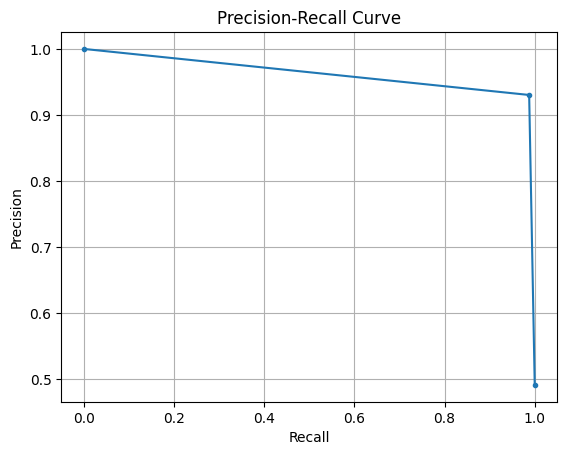

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have true labels and predicted probabilities of the positive class
# true_labels = true labels of the test set
# predicted_probs = predicted probabilities of the positive class for each instance in the test set

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import numpy as np
cm = confusion_matrix(y_test, y_pred)

# Compute F1 score
f1 = f1_score(y_test, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Confusion Matrix:
[[78  6]
 [ 1 80]]
F1 Score: 0.9580838323353293
Accuracy: 0.9575757575757575


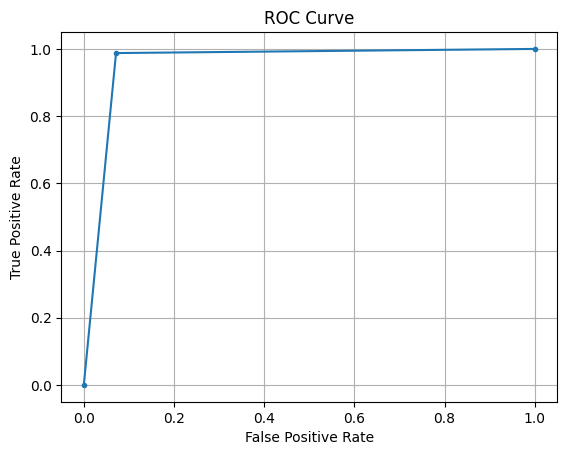

AUC: 0.9581128747795414


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

print("AUC:", auc)

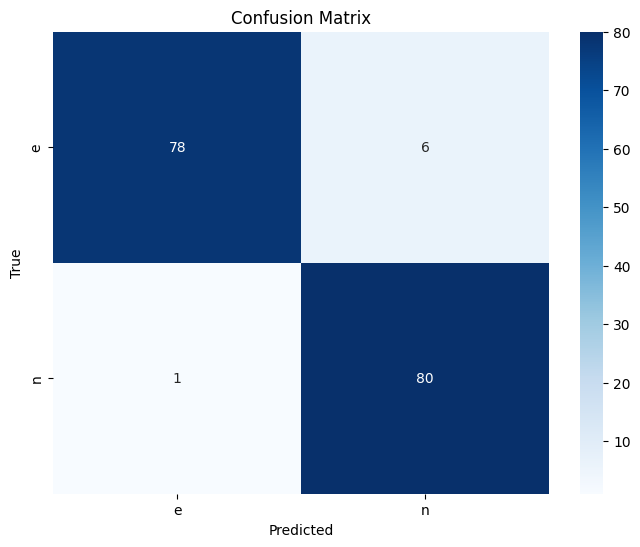

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(true_labels, predicted_labels, classes):
    """Plot the confusion matrix.

    Args:
        true_labels (array-like): True labels of the test set.
        predicted_labels (array-like): Predicted labels of the test set.
        classes (list): List of class names.
    """
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have true labels and predicted labels
# true_labels = true labels of the test set
# predicted_labels = predicted labels of the test set
# classes = list of class names

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, ["e","n"])
